In [1]:
import os, cv2, csv
import numpy as np
from keras.models import load_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from utilities import one_hot_encoding, read_train_data, read_label_data, show_train_history
from utilities import build_vgg_model, build_resnet50_model, build_inceptionv3_model

SIZE = 10000
MODEL_FOLDER = "model/"
WIDTH = 140
HEIGHT = 48
IMG_SIZE = WIDTH if WIDTH > HEIGHT else HEIGHT
NUM_DIGIT = 4
PROCESSED_FOLDER = "processed/"
LABEL_CSV_FILE = 'label.csv'
allowedChars = '234579ACFHKMNPQRTYZ';

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-cuofaos1 because the default path (/home/asrock/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# model = build_vgg_model(IMG_SIZE, allowedChars, NUM_DIGIT)
# model = build_inceptionv3_model(IMG_SIZE, allowedChars, NUM_DIGIT)
model = build_resnet50_model(IMG_SIZE, allowedChars, NUM_DIGIT)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 140, 140, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 146, 146, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 70, 70, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 70, 70, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [3]:
print("Reading training data...")

train_data = read_train_data(PROCESSED_FOLDER, SIZE)
train_label = read_label_data(LABEL_CSV_FILE, allowedChars, NUM_DIGIT, SIZE)

print("Reading completed")

Reading training data...
Reading completed


In [4]:
filepath = MODEL_FOLDER + "{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_digit4_accuracy', verbose=1, save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='auto')
tensorBoard = TensorBoard(log_dir = 'logs', histogram_freq = 1)
callbacks_list = [tensorBoard, earlystop, checkpoint]

In [5]:
# model = load_model("thsrc_cnn_model.hdf5")

In [6]:
history = model.fit(train_data, train_label, validation_split=0.2, batch_size=50, epochs=10, verbose=1, shuffle=True, callbacks=callbacks_list)

Epoch 1/10
  1/160 [..............................] - ETA: 0s - loss: 22.7267 - digit1_loss: 5.2869 - digit2_loss: 5.5707 - digit3_loss: 6.0621 - digit4_loss: 5.8069 - digit1_accuracy: 0.0800 - digit2_accuracy: 0.0400 - digit3_accuracy: 0.0400 - digit4_accuracy: 0.0200WARNING:tensorflow:From /home/asrock/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
160/160 [==============================] - ETA: 0s - loss: 4.9374 - digit1_loss: 1.2767 - digit2_loss: 1.3947 - digit3_loss: 1.3113 - digit4_loss: 0.9547 - digit1_accuracy: 0.6684 - digit2_accuracy: 0.6467 - digit3_accuracy: 0.6696 - digit4_accuracy: 0.7772
Epoch 00001: val_digit4_accuracy improved from -inf to 0.05100, saving model to model/01-4.94-12.02.hdf5
160/160 [==============================] - 441s 3s/step - loss: 4.9

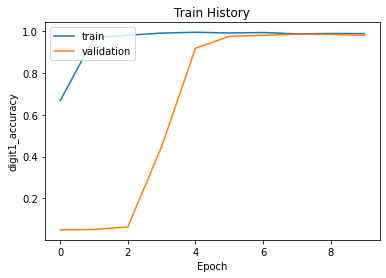

In [7]:
show_train_history(history, 'digit1_accuracy', 'val_digit1_accuracy')